In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../data/clean_data/train.csv')

In [7]:
df.head()

,Position_clean,bonus_pay,cash_bonus,company_industry_Accounting,company_industry_Advertising & Marketing,company_industry_Aerospace & Defense,company_industry_Airlines,company_industry_Architectural & Engineering Services,company_industry_Banks & Credit Unions,company_industry_Beauty & Personal Accessories Stores,...,"('gender', 'gender', 'identity')","('2', 'years', 'experience')","('color', 'national', 'origin')","('people', 'around', 'world')","('color', 'religion', 'sex')","('Senior', 'Data', 'Scientist')",Country_CA,Country_UK,Country_US,Remote
0,3,19650.0,19650.0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
1,3,19650.0,19650.0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
2,3,19650.0,19650.0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
3,3,19650.0,19650.0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
4,3,19650.0,19650.0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


In [31]:
df_ca = df[df['Country_CA'] == 1]
df_uk = df[df['Country_UK'] == 1]
df_us = df[df['Country_US'] == 1]
df_remote = df[df['Remote'] == 1]

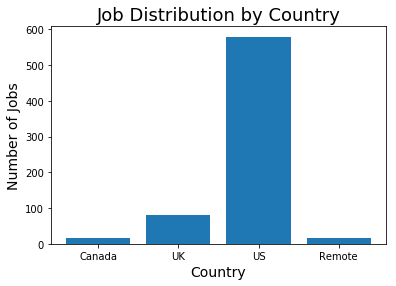

In [32]:
y1 = df_ca.shape[0]
y2 = df_uk.shape[0]
y3 = df_us.shape[0]
y4 = df_remote.shape[0]

y = [y1,y2,y3,y4]

x = [1,2,3,4]
labels = ['Canada','UK','US','Remote']

plt.bar(x,y)
plt.xticks(x,labels)
plt.ylabel("Number of Jobs",fontsize = 14)
plt.xlabel("Country",fontsize = 14)
plt.title("Job Distribution by Country",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/Country_Distribution.pdf",bbox_inches = "tight")
plt.show()

In [33]:
ca_mean_sal = df_ca['salary'].mean()
us_mean_sal = df_us['salary'].mean()
uk_mean_sal = df_uk['salary'].mean()
rem_mean_sal = df_remote['salary'].mean()

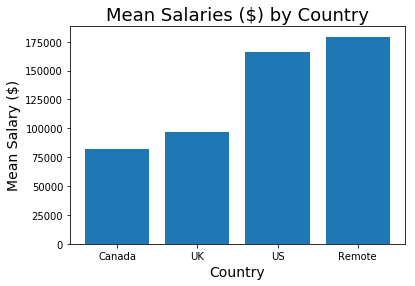

In [36]:
y = [ca_mean_sal, uk_mean_sal, us_mean_sal, rem_mean_sal]
x = [1,2,3,4]
labels = ['Canada','UK','US','Remote']

plt.bar(x,y)
plt.xticks(x,labels)
plt.ylabel("Mean Salary ($)",fontsize = 14)
plt.xlabel("Country",fontsize = 14)
plt.title("Mean Salaries ($) by Country",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/Countries_Mean_Salaries.pdf",bbox_inches = "tight")
plt.show()

In [54]:
df_us[['company_lat', 'company_long']]

,company_lat,company_long
0,47.60621,-122.33207
1,47.60621,-122.33207
2,47.60621,-122.33207
3,47.61038,-122.20068
4,47.60621,-122.33207
5,0.00000,0.00000
6,40.71427,-74.00597
7,47.60621,-122.33207
8,47.60621,-122.33207
9,47.60621,-122.33207


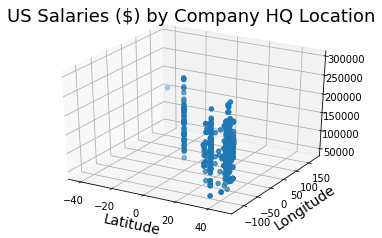

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(df_us['company_lat']), np.array(df_us['company_long']), np.array(df_us['salary']))
plt.ylabel("Longitude",fontsize = 14)
plt.xlabel("Latitude",fontsize = 14)
plt.title("US Salaries ($) by Company HQ Location",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/US_lat_long_salaries.pdf", bbox_inches = "tight")
plt.show()